# Tutorial 3, solutions


This solution is a jupyter notebook which allows you to directly interact with
the code so that you can see the effect of any changes you may like to make.

Author: Nicky van Foreest

In [1]:
import scipy

from heapq import heappop, heappush
from scipy.stats import uniform, expon

scipy.random.seed(3)


def sort_ages():
    stack = []

    heappush(stack, (21, "Jan"))
    heappush(stack, (20, "Piet"))
    heappush(stack, (18, "Klara"))
    heappush(stack, (25, "Cynthia"))

    while stack:
        age, name = heappop(stack)
        print(name, age)


sort_ages()

Klara 18
Piet 20
Jan 21
Cynthia 25


In [2]:
def sort_ages_with_more_info():
    stack = []

    heappush(stack, (21, "Jan", "Huawei"))
    heappush(stack, (20, "Piet", "Apple"))
    heappush(stack, (18, "Klara", "Motorola"))
    heappush(stack, (25, "Cynthia", "Nexus"))

    while stack:
        age, name, phone = heappop(stack)
        print(age, name, phone)


sort_ages_with_more_info()

18 Klara Motorola
20 Piet Apple
21 Jan Huawei
25 Cynthia Nexus


In [3]:
# void  code for numbering

In [4]:
ARRIVAL = 0
DEPARTURE = 1

stack = []  # this is the event stack

In [5]:
class Job:
    def __init__(self):
        self.arrival_time = 0
        self.service_time = 0
        self.departure_time = 0
        self.queue_length_at_arrival = 0

    def sojourn_time(self):
        return self.departure_time - self.arrival_time

    def waiting_time(self):
        return self.sojourn_time() - self.service_time

    def __repr__(self):
        return f"{self.arrival_time}, {self.service_time}, {self.departure_time}\n"

    def __le__(self, other):
        # this is necessary to sort jobs when they have the same arrival times.
        return self.id <= other.id

In [6]:
def experiment_1():
    labda = 2.0
    mu = 3.0
    rho = labda / mu
    F = expon(scale=1.0 / labda)  # interarrival time distribution
    G = expon(scale=1.0 / mu)  # service time distribution

    num_jobs = 10

    time = 0
    for i in range(num_jobs):
        time += F.rvs()
        job = Job()
        job.arrival_time = time
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        print(job)


experiment_1()

0.4001411934412399, 0.4105026155801149, 0

0.5720238942868375, 0.2383467686762716, 0

1.6892393010894828, 0.7553955070531961, 0

1.756339572439428, 0.07741279395386719, 0

1.7827590288232624, 0.19375523043743875, 0

1.7979248278113555, 0.20344628960353223, 0

2.321614593718849, 0.10880175821867327, 0

2.885513997386044, 0.29790158981221126, 0

2.8976510621876375, 0.272793197341875, 0

3.04769876009649, 0.17877214435204763, 0



In [7]:
class Server:
    def __init__(self):
        self.busy = False


server = Server()
queue = []
served_jobs = []  # used for statistics


def start_service(time, job):
    server.busy = True
    job.departure_time = time + job.service_time
    heappush(stack, (job.departure_time, job, DEPARTURE))


def handle_arrival(time, job):
    job.queue_length_at_arrival = len(queue)
    if server.busy:
        queue.append(job)
    else:
        start_service(time, job)


def handle_departure(time, job):
    server.busy = False
    if queue:  # queue is not empty
        next_job = queue.pop(0)  # pop oldest job in queue
        start_service(time, next_job)

In [8]:
def experiment_2():
    labda = 2.0
    mu = 3.0
    rho = labda / mu
    F = expon(scale=1.0 / labda)  # interarrival time distribution
    G = expon(scale=1.0 / mu)  # service time distribution
    num_jobs = 10  # too small, change it to a larger number, and rerun the experiment

    time = 0
    for i in range(num_jobs):
        time += F.rvs()
        job = Job()
        job.arrival_time = time
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    tot_queue = sum(j.queue_length_at_arrival for j in served_jobs)
    av_queue_length = tot_queue / len(served_jobs)
    print("Theoretical avg. queue length: ", rho * rho / (1 - rho))
    print("Simulated avg. queue length:", av_queue_length)

    tot_sojourn = sum(j.sojourn_time() for j in served_jobs)
    av_sojourn_time = tot_sojourn / len(served_jobs)
    print("Theoretical avg. sojourn time:", (1. / labda) * rho / (1 - rho))
    print("Simulated avg. sojourn time:", av_sojourn_time)


experiment_2()

Theoretical avg. queue length:  1.333333333333333
Simulated avg. queue length: 0.1
Theoretical avg. sojourn time: 0.9999999999999999
Simulated avg. sojourn time: 0.43616282815102236


In [9]:
def experiment_2a():
    labda = 2.0
    mu = 3.0
    rho = labda / mu
    F = expon(scale=1.0 / labda)  # interarrival time distribution
    G = expon(scale=1.0 / mu)  # service time distribution
    num_jobs = 1000

    time = 0
    for i in range(num_jobs):
        time += F.rvs()
        job = Job()
        job.arrival_time = time
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    tot_queue = sum(j.queue_length_at_arrival for j in served_jobs)
    av_queue_length = tot_queue / len(served_jobs)
    print("Theoretical avg. queue length: ", rho * rho / (1 - rho))
    print("Simulated avg. queue length:", av_queue_length)

    tot_sojourn = sum(j.sojourn_time() for j in served_jobs)
    av_sojourn_time = tot_sojourn / len(served_jobs)
    print("Theoretical avg. sojourn time:", (1. / labda) * rho / (1 - rho))
    print("Simulated avg. sojourn time:", av_sojourn_time)


experiment_2a()

Theoretical avg. queue length:  1.333333333333333
Simulated avg. queue length: 0.7495049504950495
Theoretical avg. sojourn time: 0.9999999999999999
Simulated avg. sojourn time: 0.7389998666992809


In [10]:
from scipy.stats import uniform

stack = []  # this is the event stack
queue = []
served_jobs = []  # used for statistics


def experiment_3():
    labda = 2.0
    mu = 3.0
    rho = labda / mu
    F = uniform(3, 0.00001)
    G = uniform(2, 0.00001)
    num_jobs = 10

    time = 0
    for i in range(num_jobs):
        time += F.rvs()
        job = Job()
        job.arrival_time = time
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    for j in served_jobs:
        print(j)


experiment_3()

3.000002695509519, 2.0000027525679416, 5.000005448077461

6.000007807537832, 2.000008753692769, 8.000016561230602

9.000013148259669, 2.000000735900243, 11.000013884159912

12.000022528752462, 2.000001265741311, 14.000023794493773

15.000027027621853, 2.0000068305113157, 17.00003385813317

18.000033368925727, 2.000003079168399, 20.000036448094125

21.000039002721504, 2.0000059730566635, 23.000044975778167

24.000039654048052, 2.0000087385505694, 26.00004839259862

27.000043611195366, 2.000004346225087, 29.000047957420453

30.00004829631633, 2.0000082152836574, 32.000056511599986



In [11]:
def pollaczek_khinchine(labda, G):
    ES = G.mean()
    rho = labda * ES
    ce2 = G.var() / ES / ES
    EW = (1. + ce2) / 2 * rho / (1 - rho) * ES
    return EW


labda = 1. / 3
F = expon(scale=1. / labda)  # interarrival time distribution
G = uniform(1, 2)

print("PK: ", labda * pollaczek_khinchine(labda, G))

PK:  0.722222222222222


In [12]:
stack = []  # this is the event stack
queue = []
served_jobs = []  # used for statistics


def test_mg1():
    job = Job()
    labda = 1.0 / 3
    F = expon(scale=1.0 / labda)  # interarrival time distribution
    G = uniform(1, 3)
    print("ES: ", G.mean(), "rho: ", labda * G.mean())

    num_jobs = 1000

    time = 0
    for i in range(num_jobs):
        time += F.rvs()
        job = Job()
        job.arrival_time = time
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    tot_queue = sum(j.queue_length_at_arrival for j in served_jobs)
    av_queue_length = tot_queue / len(served_jobs)
    print("Theoretical avg. queue length: ", labda * pollaczek_khinchine(labda, G))
    print("Simulated avg. queue length:", av_queue_length)

    tot_sojourn = sum(j.sojourn_time() for j in served_jobs)
    av_sojourn_time = tot_sojourn / len(served_jobs)
    print("Theoretical avg. sojourn time: ", pollaczek_khinchine(labda, G) + G.mean())
    print("Avg. sojourn time:", av_sojourn_time)


test_mg1()

ES:  2.5 rho:  0.8333333333333333
Theoretical avg. queue length:  2.333333333333332
Simulated avg. queue length: 1.63
Theoretical avg. sojourn time:  9.499999999999996
Avg. sojourn time: 7.575264285500065


In [13]:
import numpy as np

F = np.sort(uniform(0, 120).rvs(60))

In [14]:
from collections import Counter

stack = []  # this is the event stack
queue = []
served_jobs = []  # used for statistics


def check_in():
    num_jobs = 60
    F = np.sort(uniform(0, 120).rvs(num_jobs))
    G = uniform(1, 3)

    for i in range(num_jobs):
        job = Job()
        job.arrival_time = F[i]
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    tot_queue = sum(j.queue_length_at_arrival for j in served_jobs)
    av_queue_length = tot_queue / len(served_jobs)
    print("Simulated avg. queue length:", av_queue_length)

    tot_sojourn = sum(j.sojourn_time() for j in served_jobs)
    av_sojourn_time = tot_sojourn / len(served_jobs)
    print("Avg. sojourn time:", av_sojourn_time)

    c = Counter([j.queue_length_at_arrival for j in served_jobs])
    print("Queue length distribution, sloppy output")
    print(sorted(c.items()))


check_in()

Simulated avg. queue length: 5.0
Avg. sojourn time: 17.437362698760733
Queue length distribution, sloppy output
[(0, 13), (1, 6), (2, 7), (3, 7), (4, 2), (5, 2), (6, 4), (7, 1), (8, 3), (9, 2), (10, 1), (11, 2), (12, 2), (13, 2), (14, 4), (15, 2)]


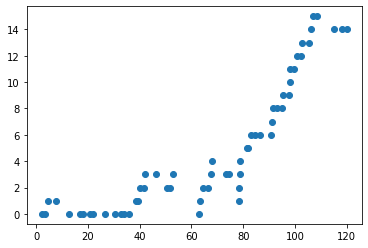

In [15]:
import matplotlib.pyplot as plt

x = [job.arrival_time for job in served_jobs]
y = [job.queue_length_at_arrival for job in served_jobs]

plt.plot(x, y, "o")
plt.show()

Simulated avg. queue length: 0.85
Avg. sojourn time: 4.118316559733122


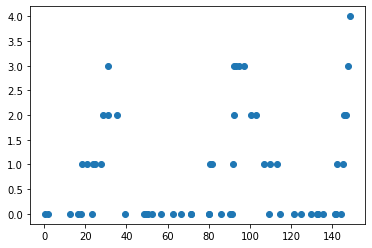

In [16]:
stack = []  # this is the event stack
queue = []
served_jobs = []  # used for statistics


def check_in_2():
    num_jobs = 60
    F = np.sort(uniform(0, 150).rvs(num_jobs))
    G = uniform(1, 2)

    for i in range(num_jobs):
        job = Job()
        job.arrival_time = F[i]
        job.service_time = G.rvs()
        heappush(stack, (job.arrival_time, job, ARRIVAL))

    while stack:
        time, job, typ = heappop(stack)
        if typ == ARRIVAL:
            handle_arrival(time, job)
        else:
            handle_departure(time, job)
            served_jobs.append(job)

    tot_queue = sum(j.queue_length_at_arrival for j in served_jobs)
    av_queue_length = tot_queue / len(served_jobs)
    print("Simulated avg. queue length:", av_queue_length)

    tot_sojourn = sum(j.sojourn_time() for j in served_jobs)
    av_sojourn_time = tot_sojourn / len(served_jobs)
    print("Avg. sojourn time:", av_sojourn_time)

    x = [job.arrival_time for job in served_jobs]
    y = [job.queue_length_at_arrival for job in served_jobs]
    
    plt.plot(x, y, "o")
    plt.show()


check_in_2()
